In [1]:
from sklearn.datasets import load_wine

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # is used for scaling the data
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [80]:
X, y = load_wine(return_X_y=True)

pipe = Pipeline( [
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1)) # We can change the no. of neighbours as if to set how many pts will be used to predict the point.
]) # We have now made a pipeline

In [68]:
mod = KNeighborsRegressor().fit(X,y)

In [70]:
pipe.fit(X,y) # the entire pipeline is now trained

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [72]:
pred = pipe.predict(X) # we have now replaced the model with the pipeline
# Here the issue is that our model predicts on the points it has already been trained on 

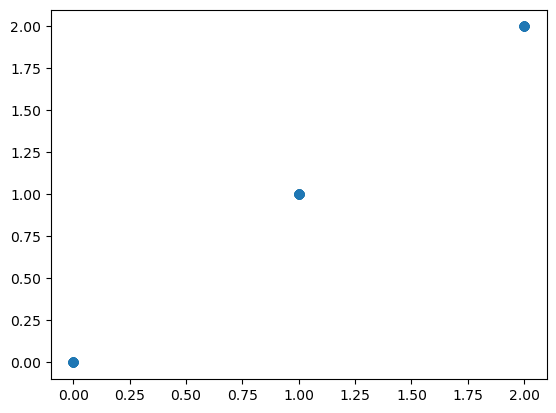

In [74]:
plt.scatter(pred,y) #there will be changes in the plot as well, and it will be better clustered
# for predicting any pt, it uses the 5 nearest neighbours and takes their average 

In [76]:
X.shape

(178, 13)

In [90]:
X, y = load_wine(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1)) # We can change the no. of neighbours as if to set how many pts will be used to predict the point.
]) # We have now made a pipeline
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [96]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                   cv=3) 
# we did this to find out the results wrt to every neighbour setting

In [98]:
mod.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [102]:
pd.DataFrame(mod.cv_results_) #this is used to check the results of cross validation

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003838,0.000310,0.003843,0.000259,1,{'model__n_neighbors': 1},-59.000000,0.0,-4.922348,-21.307449,26.728308,1
1,0.003066,0.000756,0.004281,0.000834,2,{'model__n_neighbors': 2},-59.000000,0.0,-5.089962,-21.363321,26.694152,2
2,0.004658,0.001137,0.004264,0.001467,3,{'model__n_neighbors': 3},-59.790960,0.0,-5.493476,-21.761479,26.984263,3
3,0.002612,0.000809,0.004681,0.000493,4,{'model__n_neighbors': 4},-60.271186,0.0,-5.697562,-21.989583,27.168934,4
4,0.002342,0.000470,0.002878,0.000595,5,{'model__n_neighbors': 5},-60.586441,0.0,-5.910152,-22.165531,27.274618,5
5,0.003011,0.000822,0.004479,0.000422,6,{'model__n_neighbors': 6},-61.005650,0.0,-5.999421,-22.335024,27.453734,6
6,0.003851,0.000837,0.004344,0.000466,7,{'model__n_neighbors': 7},-61.926323,0.0,-6.060297,-22.662207,27.873942,7
7,0.003668,0.001255,0.004389,0.000452,8,{'model__n_neighbors': 8},-63.544492,0.0,-6.235322,-23.259938,28.598995,8
8,0.002775,0.000566,0.003410,0.000425,9,{'model__n_neighbors': 9},-65.340239,0.0,-6.263258,-23.867832,29.436683,9
9,0.005163,0.001790,0.006215,0.000650,10,{'model__n_neighbors': 10},-66.474576,0.0,-6.387292,-24.287289,29.944669,10


In [112]:
print(load_wine()['DESCR'])
# to know about our dataset

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3